# Script for Fig. 2H NVS et al. (2021)

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from copy import deepcopy
import numpy as np
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import json
import os
from scipy import signal

import sys
sys.path.insert(0, '/Users/natvan/CortexControl.app/Contents/MacOS/teili/')

from teili.tools.visualizer.DataViewers import PlotSettings
from teili.tools.visualizer.DataModels import EventsModel, StateVariablesModel
from teili.tools.visualizer.DataControllers import DataController, LineplotController, RasterplotController, HistogramController

from utils_natacha_3 import get_meanfiringrate_from_network_activity,get_network_activity_as_matrix, SpikeEvents, load_recordings_into_spikeevents
DC = DataController()

### load recordings 

In [2]:
# define what neuron ids to look at / ignore
neuron_ids_col3 = list(range(17, 116+1))
min_neuron_id = np.min(neuron_ids_col3)
max_neuron_id = np.max(neuron_ids_col3)

neuron_ids_to_remove = [57, 47, 107, 90, 74, 65, 61, 70, 111]
for id_to_remove in neuron_ids_to_remove:
    neuron_ids_col3.remove(id_to_remove)

network_activity_org = {}
all_active_neuron_ids = {}

# names of recordings to load (I assume that all your recordings are in the same folder at "base_dir_rec", for you maybe: '/Users/natvan/CortexControl_Study/rec/TEST/newb/code_updated/')
base_dir_recs = '/Users/natvan/CortexControl_Study/rec/TEST/newb/PAPER1/COVID19PERIOD//'  
all_rec_names = {}
#all_rec_names['OD1'] = ['214940_OD1', '222141_OD1', '220721_OD1',  '223429_OD1', '224216_OD1', '224829_OD1', '233558_OD1', '232912_OD1', '234204_OD1' ]
all_rec_names['OD1'] = [ '111347_OD1_CODE_UPDATED','110321_OD1long_justavecdefaultbaises',  '223429_OD1', '224216_OD1', '224829_OD1', '233558_OD1', '232912_OD1', '234204_OD1' ]
all_rec_names['OD2'] = ['125906_OD21000','132659_1', '134217_2','112024_OD2_CODE_UPDATED', '151126_OD2_CODE_UPDATED_LONGER', '140510_3', '141047_4',  '224453_OD2test', '225840_OD2test',  '231635_OD2test']
all_rec_names['OD3'] = ['111107_OD3_100stim', '105330_OD3_100stim', '104522_OD3_100stim', '103803_OD3_100stim', '111852_OD3_100stim', '112721_OD3_100stim', '103019_OD3_100stim', '102026_OD3_100stim','113549_OD3_100stim', '120453_OD3_100stim']
all_rec_names['OD4'] = ['152424_OD4_CODE_UPDATED_LONGER', '114517_OD4_CODE_UPDATED', '130240_OD4_60stim_latexcitinhi_TRY2', '130047_OD4_60stim_latexcitinhi_TRY2', '115301_OD4_60stim_latexcitinhi', '115047_OD4_60stim_latexcitinhi', '114836_OD4_60stim_latexcitinhi',  '102957_OD4longerrun']
all_rec_names['OD6'] = ['154142_OD6_TEST_75STIM_27MAY', '145315_OD6_TEST_125STIM_10JUN', '151555_OD6_TEST_125STIM_10JUN',  '155123_OD6_TEST_125STIM_10JUN', '161629_OD6_TEST_125STIM_10JUN', '163638_OD6_TEST_125STIM_10JUN', '165607_OD6_TEST_125STIM_10JUN', '171508_OD6_TEST_125STIM_10JUN' ]

#'153539_OD6_TEST_125STIM_10JUN',

for OD_name, OD_rec_names in all_rec_names.items():
    for rec_name in OD_rec_names:
        path_to_rec = base_dir_recs+rec_name+'.json'
        all_active_neuron_ids[rec_name] = neuron_ids_col3
        network_activity_org[rec_name]  = load_recordings_into_spikeevents(path_to_recording=path_to_rec, active_neuron_ids=all_active_neuron_ids[rec_name])
        
# info on number of recordings (used later to simplifiy plotting)
paradigm_names_ordered = ['OD1', 'OD2', 'OD3', 'OD4', 'OD6']  # required later for plotting because python dictionary do not necessarily preserve order of elements
n_paradigms = len(all_rec_names.keys())
n_recs = []
for OD_name, OD_rec_names in all_rec_names.items():
    n_recs.append(len(OD_rec_names))
max_n_recs_per_paradigm = np.max(n_recs)

### plot raster plots

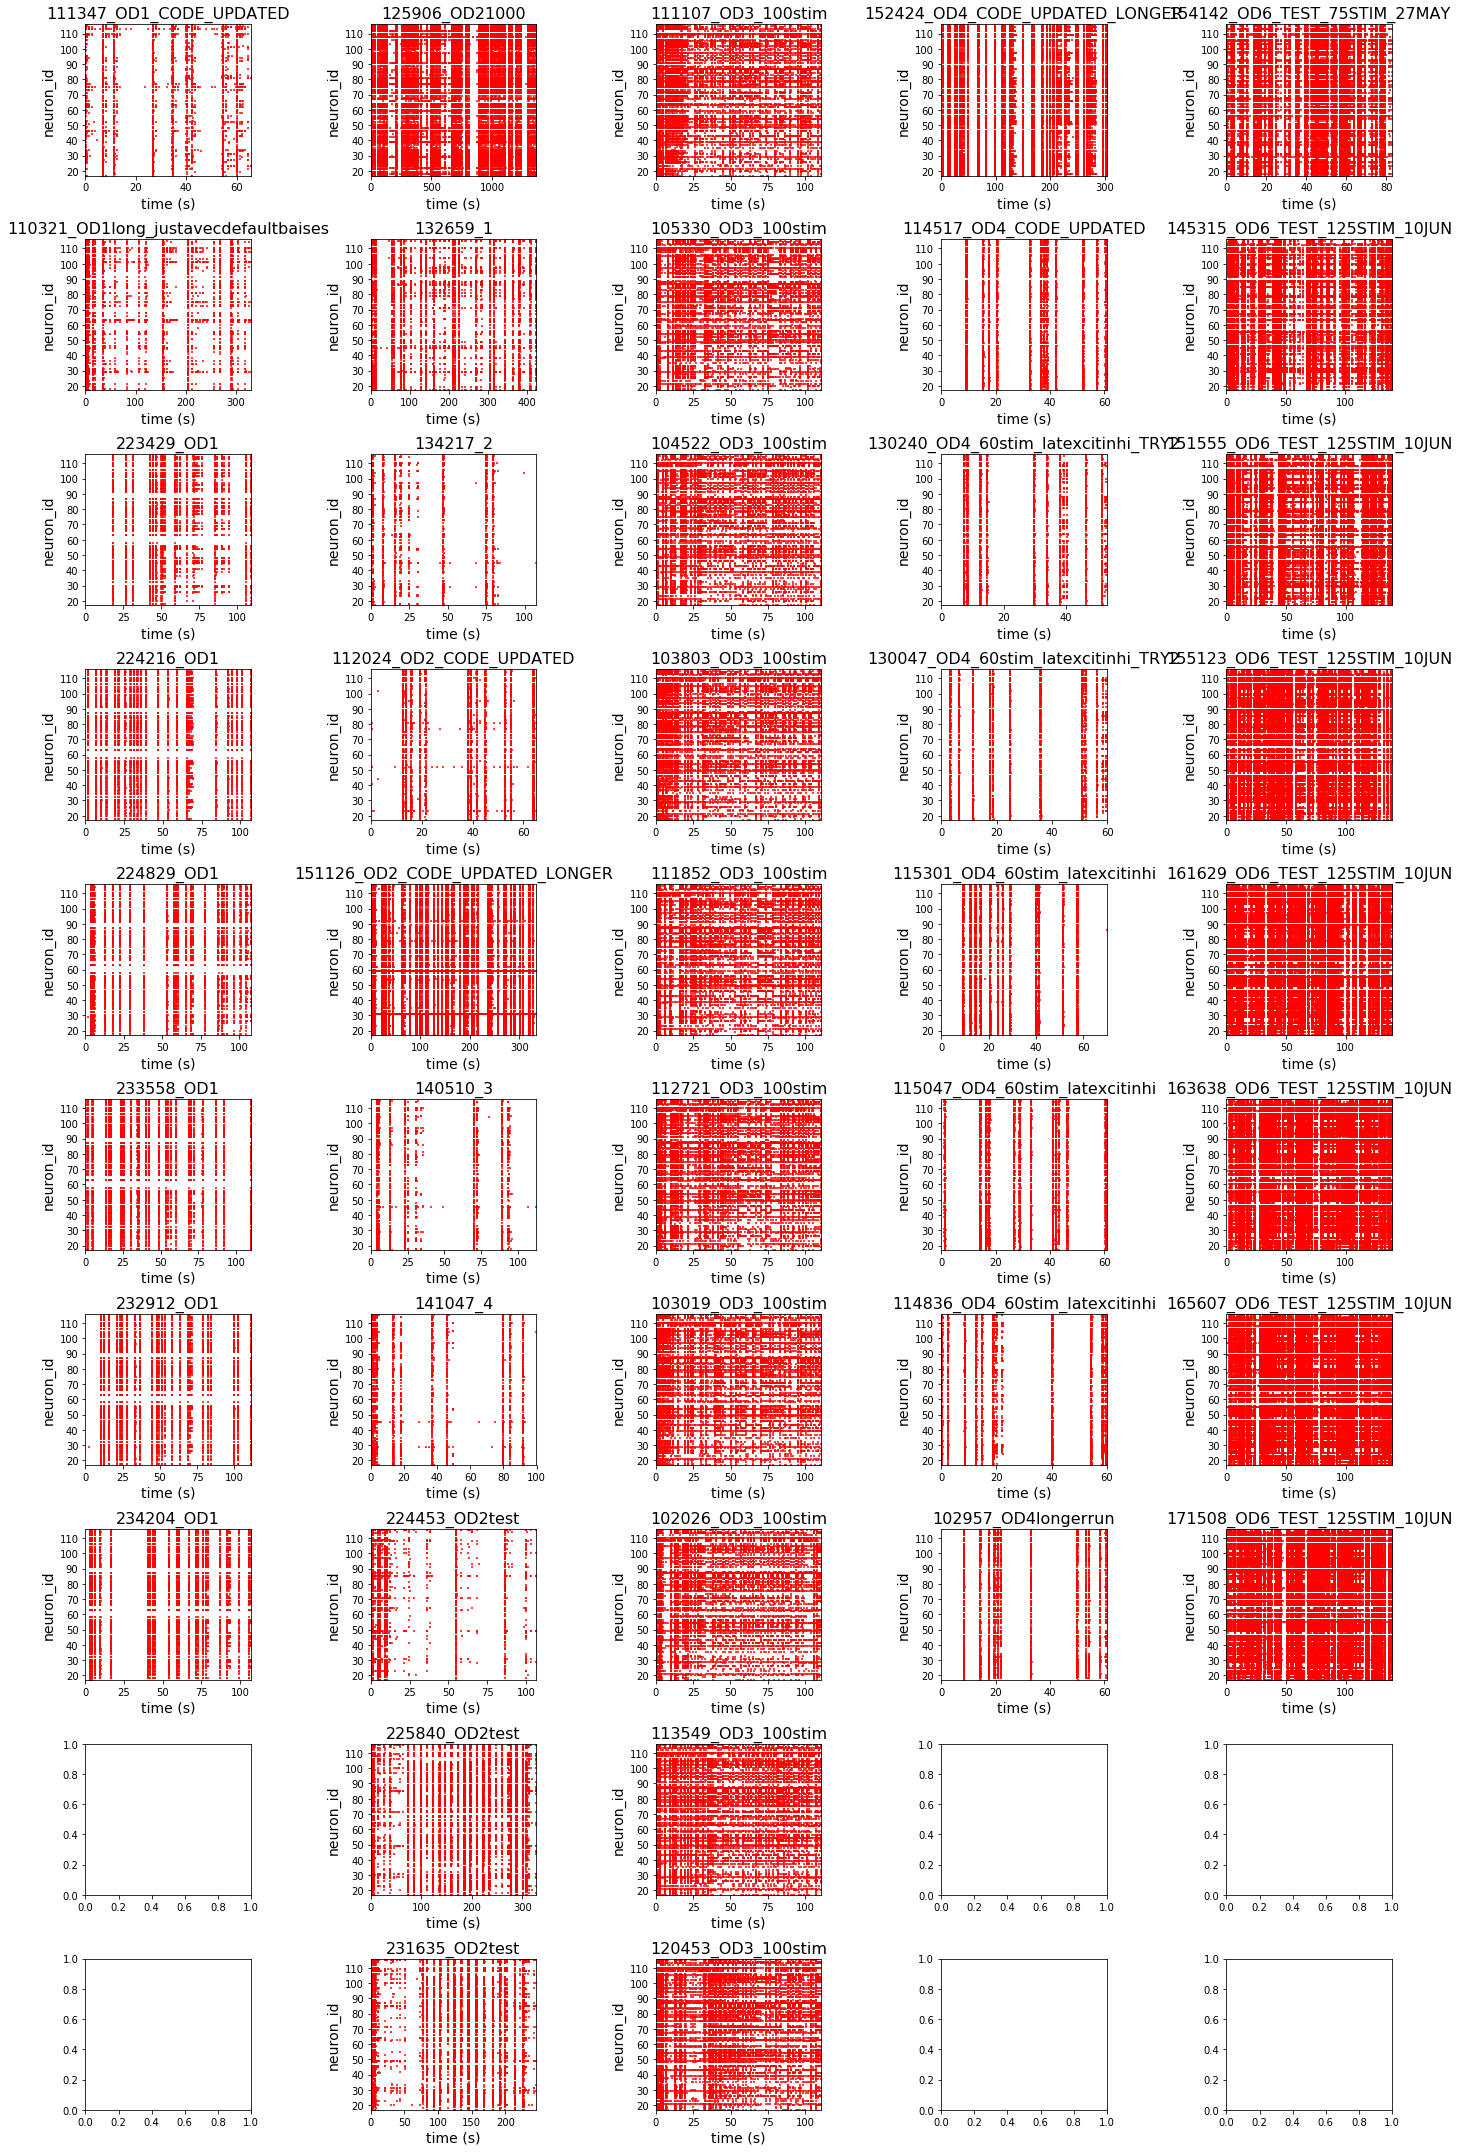

In [3]:
fig, axes = plt.subplots(ncols=n_paradigms, nrows=max_n_recs_per_paradigm, figsize=(20, 3*max_n_recs_per_paradigm))
for paradigm_nr, OD_name in enumerate(paradigm_names_ordered):
    OD_rec_names = all_rec_names[OD_name]
    for rec_nr, rec_name_to_show in enumerate(OD_rec_names):
        ax = axes[rec_nr, paradigm_nr]
        eventsmodel  = EventsModel(neuron_ids=network_activity_org[rec_name_to_show].neuron_id, spike_times=network_activity_org[rec_name_to_show].ts)
        RasterplotController([eventsmodel], title = rec_name_to_show, xlabel='time (s)', ylabel='neuron_id', 
                             neuron_id_range=(min_neuron_id, max_neuron_id), time_range=None, mainfig=fig, subfig_rasterplot=ax, show_immediately=False)
        
plt.tight_layout()

### set and plot mean firing rates

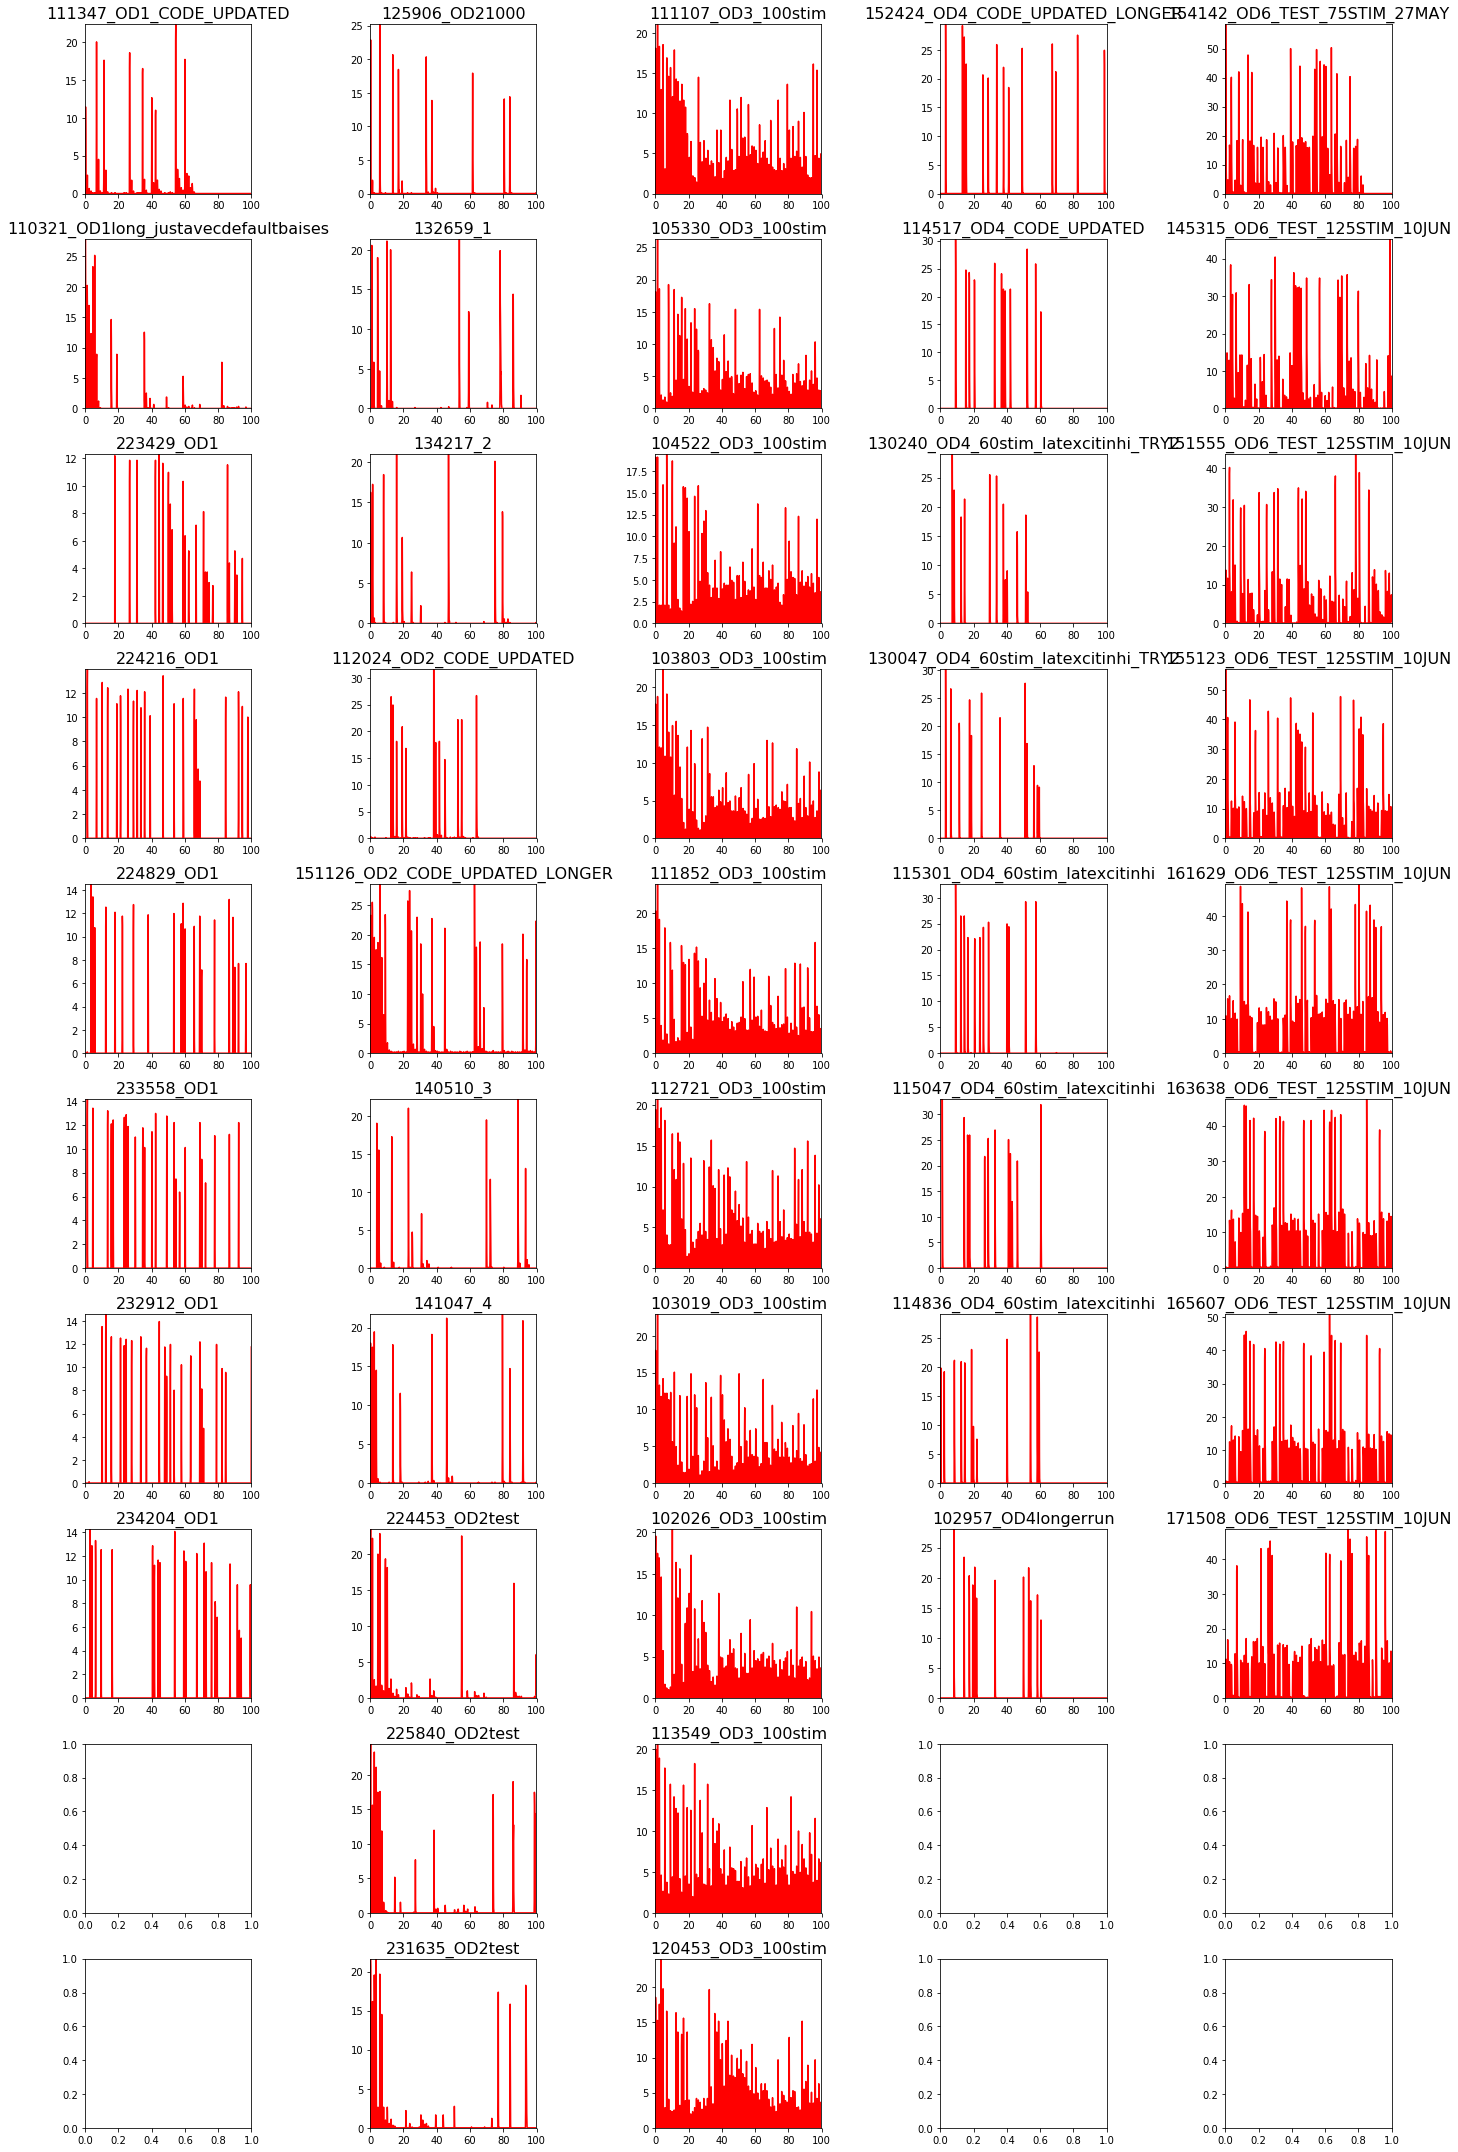

In [4]:
t_start     = 0
t_end       = 100
step_size   = 0.1#0.005
window_size = 0.1#0.01
get_meanfiringrate_from_network_activity(network_activity=network_activity_org,
                                         max_neuron_id=max_neuron_id, t_start=t_start, t_end=t_end,
                                         step_size=step_size, window_size=window_size,
                                         pop_average=True, active_neuron_ids=all_active_neuron_ids)

# plot
fig, axes = plt.subplots(ncols=n_paradigms, nrows=max_n_recs_per_paradigm, figsize=(20, 3*max_n_recs_per_paradigm))
for paradigm_nr, OD_name in enumerate(paradigm_names_ordered):
    OD_rec_names = all_rec_names[OD_name]
    for rec_nr, rec_name_to_show in enumerate(OD_rec_names):
        ax = axes[rec_nr, paradigm_nr]
        datamodel = StateVariablesModel(state_variable_names=['mfr'], state_variables=[network_activity_org[rec_name_to_show].mfr.flatten()], 
                                        state_variables_times=[network_activity_org[rec_name_to_show].t_mfr[:, 1]])
        LineplotController(DataModel_to_x_and_y_attr=[(datamodel , ('t_mfr', 'mfr'))], mainfig=fig, subfig=ax, show_immediately=False, title = rec_name_to_show)
plt.tight_layout()

### detect peaks per recording  - step 1: detect all peaks

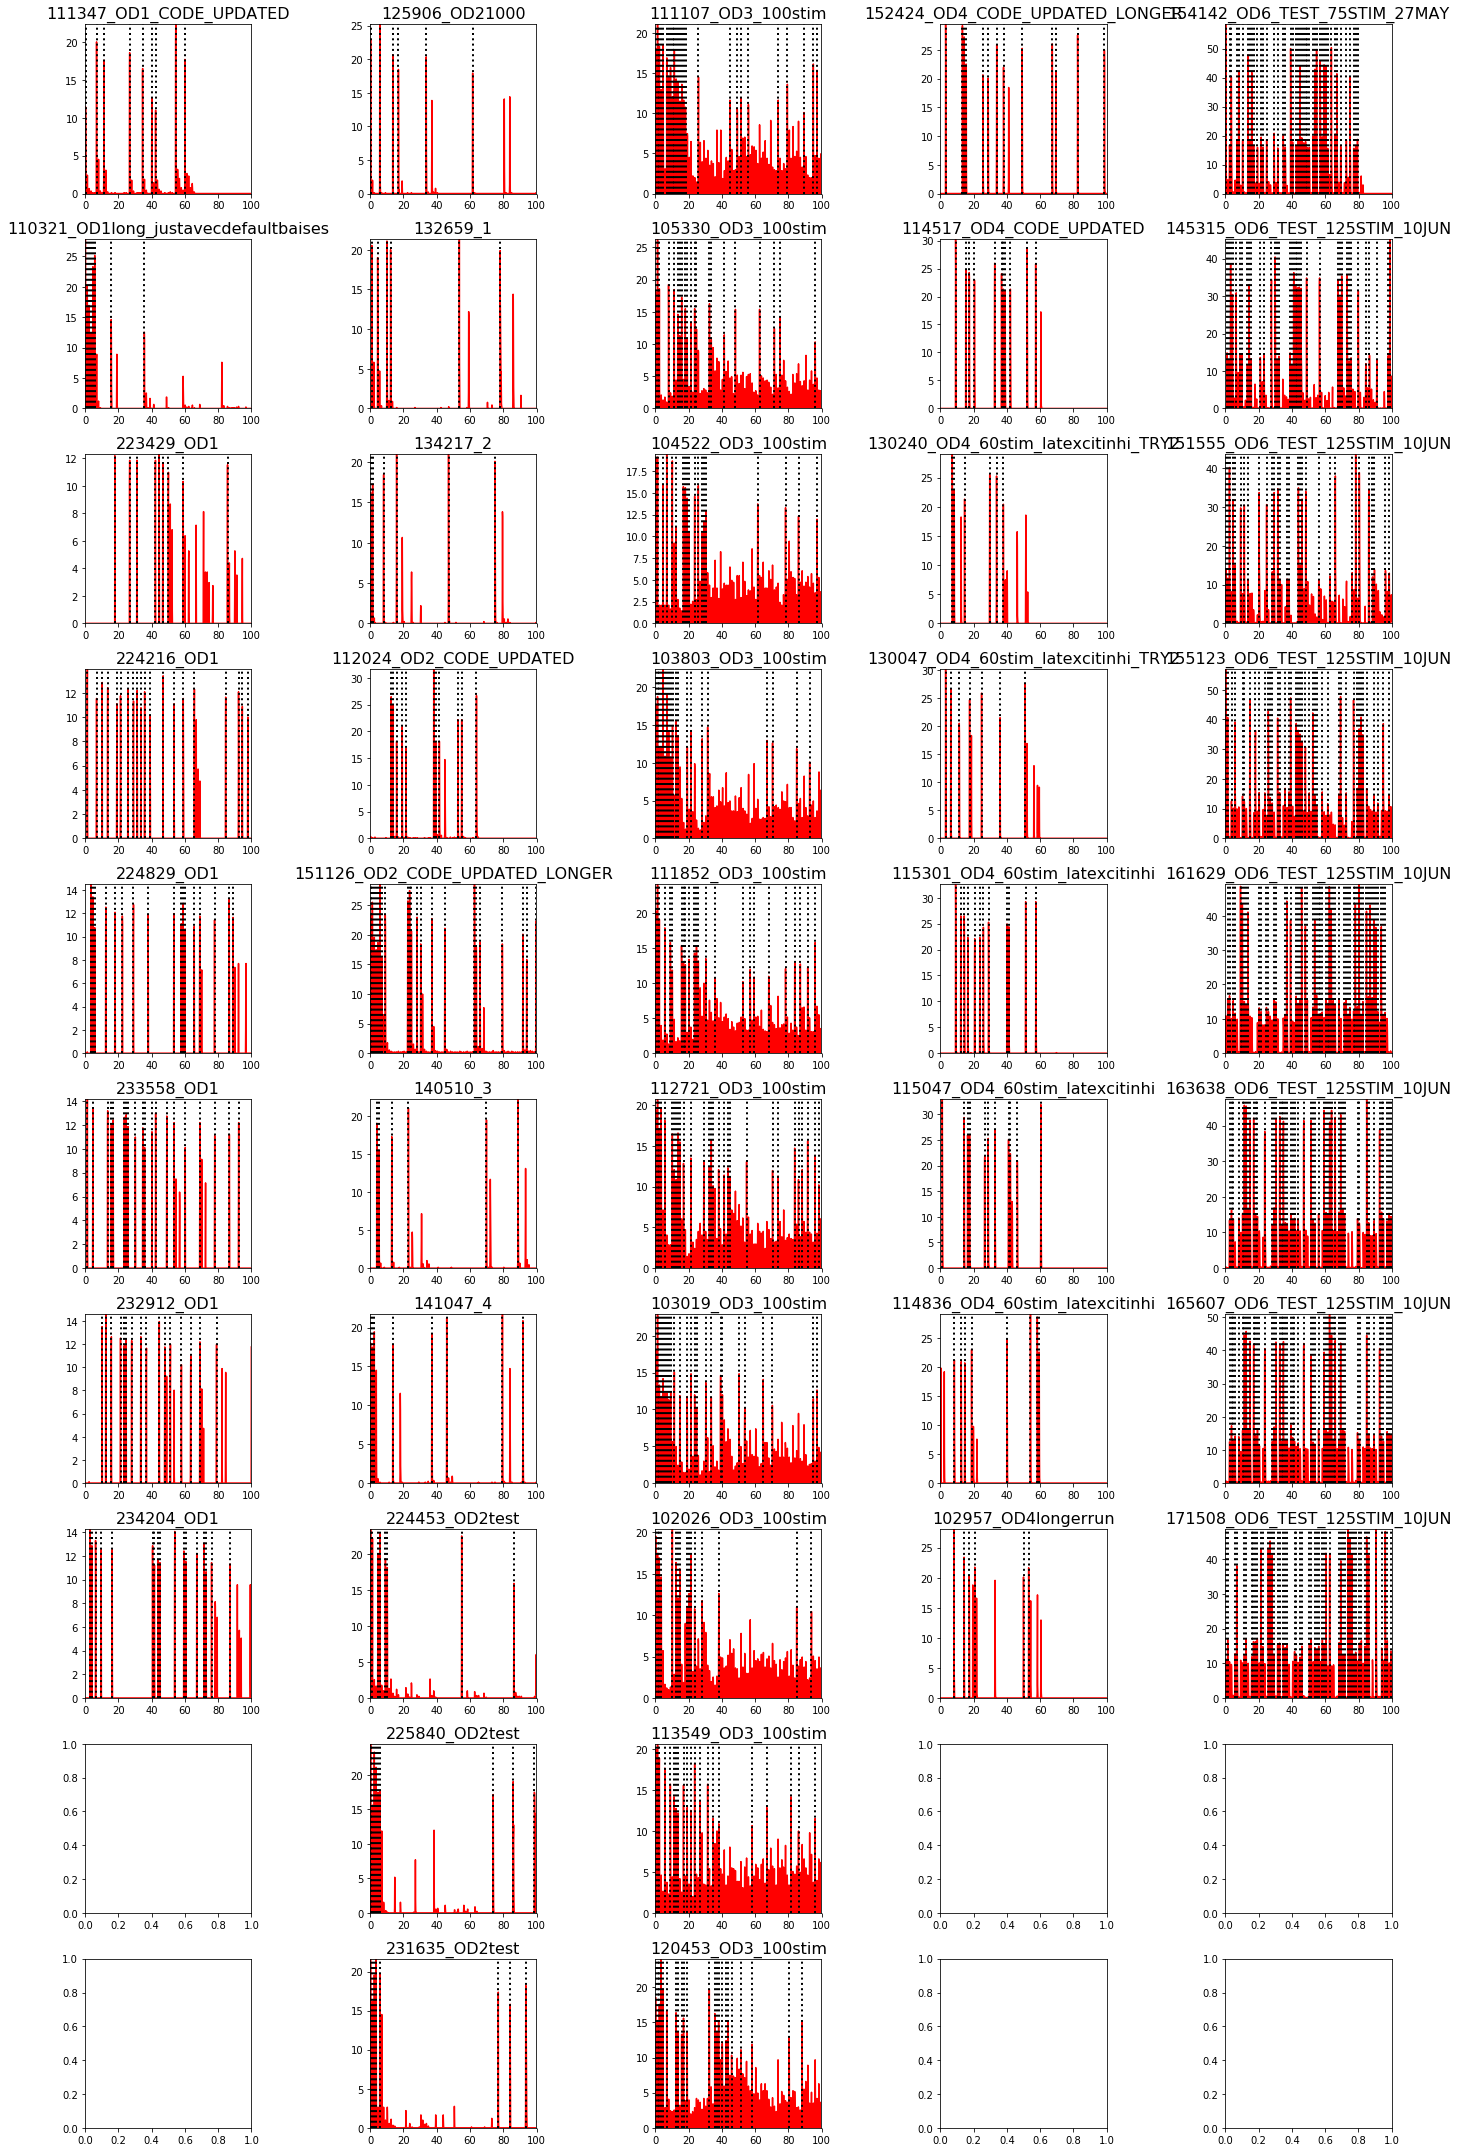

In [5]:
min_distance_between_peaks = 0.2 / step_size  # stimulus duration / step_size

# you might want to adjust these thresholds to detect the peaks correctly with help of the MFR-plot below
activity_threshold_per_rec = {}
activity_threshold_per_rec['223429_OD1'] = 10
activity_threshold_per_rec['224216_OD1'] = 10
activity_threshold_per_rec['224829_OD1'] = 10
activity_threshold_per_rec['233558_OD1'] = 10
activity_threshold_per_rec['232912_OD1'] = 10
activity_threshold_per_rec['234204_OD1' ] = 10
activity_threshold_per_rec['111347_OD1_CODE_UPDATED'] = 10
activity_threshold_per_rec['110321_OD1long_justavecdefaultbaises'] = 10


activity_threshold_per_rec['125906_OD21000'] =15
activity_threshold_per_rec['132659_1'] =15
activity_threshold_per_rec['134217_2'] =15
activity_threshold_per_rec['140510_3'] =15
activity_threshold_per_rec['141047_4'] =15
activity_threshold_per_rec['224453_OD2test'] = 15
activity_threshold_per_rec['225840_OD2test'] =15
activity_threshold_per_rec['231635_OD2test'] =15 
activity_threshold_per_rec['112024_OD2_CODE_UPDATED'] =15 
activity_threshold_per_rec['151126_OD2_CODE_UPDATED_LONGER'] =15 

activity_threshold_per_rec['111852_OD3_100stim'] = 10
activity_threshold_per_rec['112721_OD3_100stim'] = 10
activity_threshold_per_rec['113549_OD3_100stim'] = 10
activity_threshold_per_rec['120453_OD3_100stim'] = 10
activity_threshold_per_rec['111107_OD3_100stim'] = 10
activity_threshold_per_rec['105330_OD3_100stim'] = 10
activity_threshold_per_rec['104522_OD3_100stim'] = 10
activity_threshold_per_rec['103803_OD3_100stim'] = 10
activity_threshold_per_rec['103019_OD3_100stim'] = 10
activity_threshold_per_rec['102026_OD3_100stim'] = 10

activity_threshold_per_rec['152424_OD4_CODE_UPDATED_LONGER'] =20
activity_threshold_per_rec['114517_OD4_CODE_UPDATED'] =20
activity_threshold_per_rec['130240_OD4_60stim_latexcitinhi_TRY2'] =20
activity_threshold_per_rec['130047_OD4_60stim_latexcitinhi_TRY2'] =20
activity_threshold_per_rec['115301_OD4_60stim_latexcitinhi'] =20
activity_threshold_per_rec['115047_OD4_60stim_latexcitinhi'] =20
activity_threshold_per_rec['114836_OD4_60stim_latexcitinhi'] =20
#activity_threshold_per_rec['151739_OD4_60stim'] =20
activity_threshold_per_rec['102957_OD4longerrun'] =20

    
activity_threshold_per_rec['154142_OD6_TEST_75STIM_27MAY'] = 11
activity_threshold_per_rec['145315_OD6_TEST_125STIM_10JUN'] = 11
activity_threshold_per_rec['151555_OD6_TEST_125STIM_10JUN'] = 11
#activity_threshold_per_rec['153539_OD6_TEST_125STIM_10JUN'] = 11
activity_threshold_per_rec['155123_OD6_TEST_125STIM_10JUN'] = 11
activity_threshold_per_rec['161629_OD6_TEST_125STIM_10JUN'] = 11
activity_threshold_per_rec['163638_OD6_TEST_125STIM_10JUN'] = 11
activity_threshold_per_rec['165607_OD6_TEST_125STIM_10JUN'] = 11
activity_threshold_per_rec['171508_OD6_TEST_125STIM_10JUN'] = 11



# find peaks and set as t_poppeaks
for rec_name, column_events in network_activity_org.items():
    poppeaks_indices, poppeaks_properties = signal.find_peaks(column_events.mfr.flatten(), height=activity_threshold_per_rec[rec_name], distance=min_distance_between_peaks)
    network_activity_org[rec_name].t_poppeaks = column_events.t_mfr[poppeaks_indices, 1].flatten()
    
# plot mfr and detected peaks
fig, axes = plt.subplots(ncols=n_paradigms, nrows=max_n_recs_per_paradigm, figsize=(20, 3*max_n_recs_per_paradigm))
for paradigm_nr, OD_name in enumerate(paradigm_names_ordered):
    OD_rec_names = all_rec_names[OD_name]
    for rec_nr, rec_name_to_show in enumerate(OD_rec_names):
        ax = axes[rec_nr, paradigm_nr]
        datamodel = StateVariablesModel(state_variable_names=['mfr'], state_variables=[network_activity_org[rec_name_to_show].mfr.flatten()], 
                                        state_variables_times=[network_activity_org[rec_name_to_show].t_mfr[:, 1]])
        LineplotController(DataModel_to_x_and_y_attr=[(datamodel , ('t_mfr', 'mfr'))], mainfig=fig, subfig=ax, show_immediately=False, title=rec_name_to_show)
        for t_peak in network_activity_org[rec_name_to_show].t_poppeaks:
            ax.axvline(x=t_peak, color='k', linestyle=':', linewidth=2)
plt.tight_layout()   

### detect peaks per recording  - step 2: fix standard

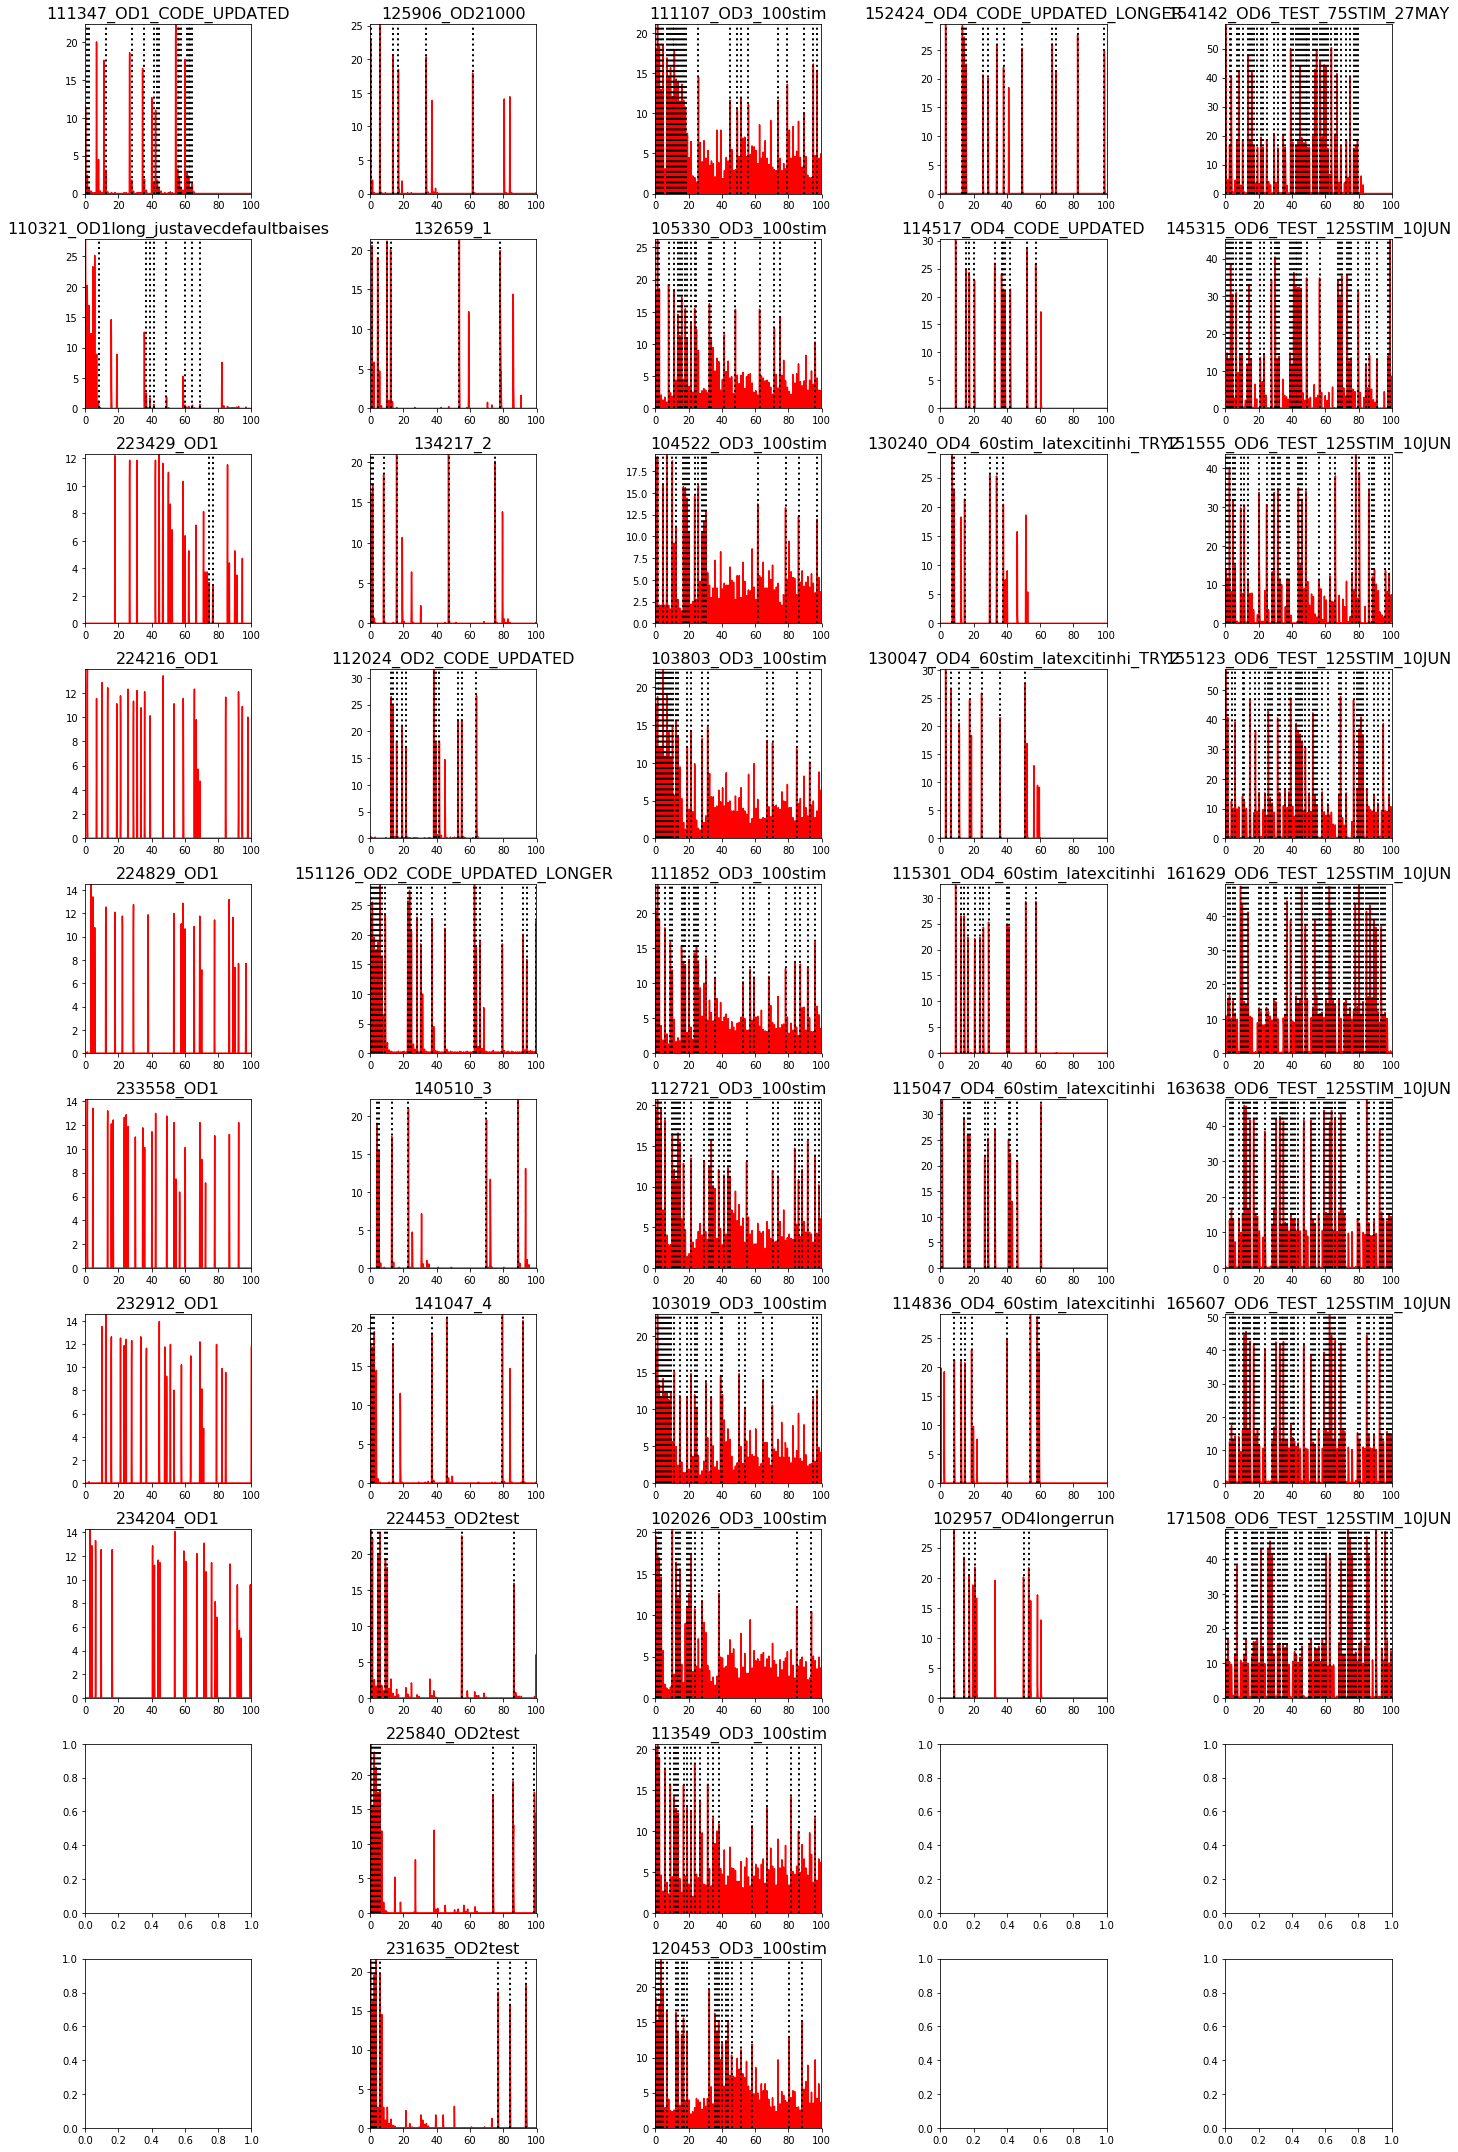

In [6]:
# define for which recordings the stimulus_times to considere should be updated now with the detected peak times:
# recording where the frequency analysed is presented as the standard, It will deduce the time point when the deviant was presented by looking only at peaks with a given height (i.e. not too large)
# !!! CAUTION: I didn't remember which OD number this refers to, so here you (Natacha) have to briefly check carefully that I apply this to the correct recordings

verbose = False  # if True, print peak times (but it's a lot so maybe you do not want to print them all the time :-))

min_peak_height = 0.5
max_peak_height = 3.5

OD_name = 'OD1'
OD_rec_names = all_rec_names[OD_name]
for rec_nr, rec_name_to_adjust in enumerate(OD_rec_names):
    poppeaks_indices_std, _ = signal.find_peaks(network_activity_org[rec_name_to_adjust].mfr.flatten(), height=[min_peak_height, max_peak_height], distance=min_distance_between_peaks)
    network_activity_org[rec_name_to_adjust].t_poppeaks = network_activity_org[rec_name_to_adjust].t_mfr[poppeaks_indices_std, 1].flatten()

# per recording plot mfr and t_poppeaks
fig, axes = plt.subplots(ncols=n_paradigms, nrows=max_n_recs_per_paradigm, figsize=(20, 3*max_n_recs_per_paradigm))
for paradigm_nr, OD_name in enumerate(paradigm_names_ordered):
    OD_rec_names = all_rec_names[OD_name]
    for rec_nr, rec_name_to_show in enumerate(OD_rec_names):
        ax = axes[rec_nr, paradigm_nr]
        datamodel = StateVariablesModel(state_variable_names=['mfr'], state_variables=[network_activity_org[rec_name_to_show].mfr.flatten()], 
                                        state_variables_times=[network_activity_org[rec_name_to_show].t_mfr[:, 1]])
        LineplotController(DataModel_to_x_and_y_attr=[(datamodel , ('t_mfr', 'mfr'))], mainfig=fig, subfig=ax, show_immediately=False, title=rec_name_to_show)
        for t_peak in network_activity_org[rec_name_to_show].t_poppeaks:
            ax.axvline(x=t_peak, color='k', linestyle=':', linewidth=2)
plt.tight_layout()

### detect peaks per recording - step 3: remove offset

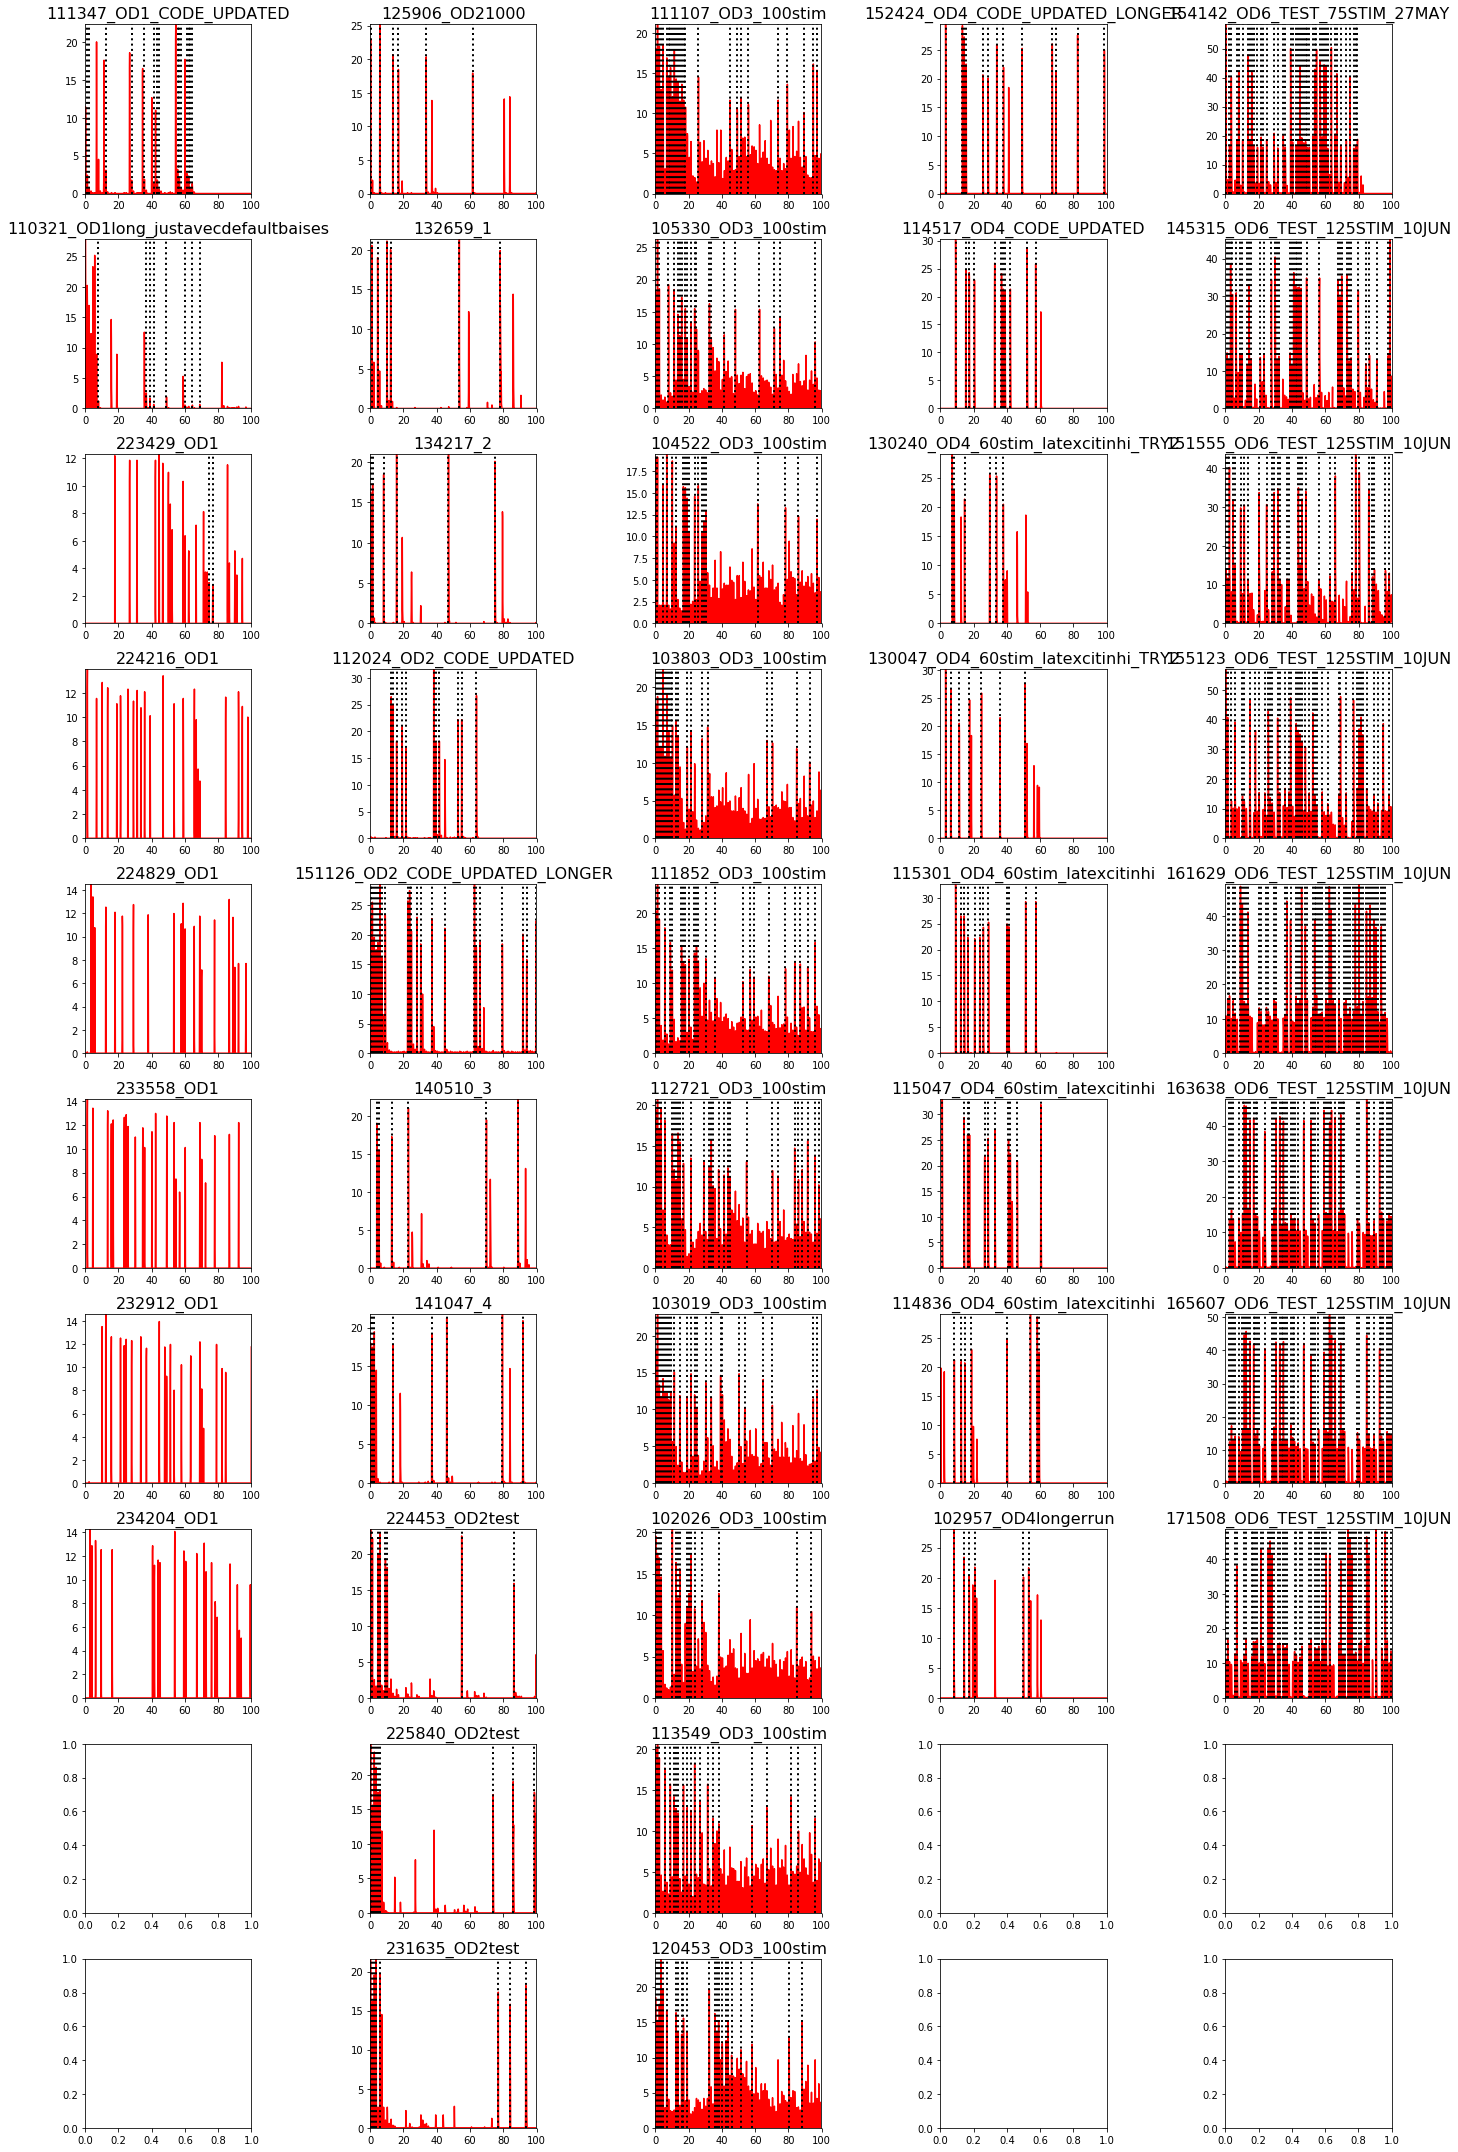

In [7]:
# remove offset from all recording times and set detected peaks as stimulation times (stim_tiemes_per_cond)
t_offset = 0.05  # seconds
stim_times_per_cond = {}
for paradigm_nr, OD_name in enumerate(paradigm_names_ordered):
    OD_rec_names = all_rec_names[OD_name]
    for rec_nr, rec_name in enumerate(OD_rec_names):
        stim_times_per_cond[rec_name] = np.asarray(network_activity_org[rec_name].t_poppeaks) - t_offset
        
# per recording plot mfr and stim_times_per_cond
fig, axes = plt.subplots(ncols=n_paradigms, nrows=max_n_recs_per_paradigm, figsize=(20, 3*max_n_recs_per_paradigm))
for paradigm_nr, OD_name in enumerate(paradigm_names_ordered):
    OD_rec_names = all_rec_names[OD_name]
    for rec_nr, rec_name_to_show in enumerate(OD_rec_names):
        ax = axes[rec_nr, paradigm_nr]
        datamodel = StateVariablesModel(state_variable_names=['mfr'], state_variables=[network_activity_org[rec_name_to_show].mfr.flatten()], 
                                        state_variables_times=[network_activity_org[rec_name_to_show].t_mfr[:, 1]])
        LineplotController(DataModel_to_x_and_y_attr=[(datamodel , ('t_mfr', 'mfr'))], mainfig=fig, subfig=ax, show_immediately=False, title=rec_name_to_show)
        for t_peak in stim_times_per_cond[rec_name_to_show]:
            ax.axvline(x=t_peak, color='k', linestyle=':', linewidth=2)
plt.tight_layout()

### detect peaks per recording  - step 4: adjust manually if needed (optional)


 111347_OD1_CODE_UPDATED 
 [ 1.35  2.45 12.45 27.95 35.65 41.15 43.35 44.45 55.55 56.65 57.75 61.15
 62.25 63.25 64.35]
111347_OD1_CODE_UPDATED num_peaks: 15

 110321_OD1long_justavecdefaultbaises 
 [ 8.05 36.75 38.95 41.25 48.85 60.05 64.45 68.85]
110321_OD1long_justavecdefaultbaises num_peaks: 8

 223429_OD1 
 [74.45 76.75]
223429_OD1 num_peaks: 2

 224216_OD1 
 []
224216_OD1 num_peaks: 0

 224829_OD1 
 []
224829_OD1 num_peaks: 0

 233558_OD1 
 []
233558_OD1 num_peaks: 0

 232912_OD1 
 []
232912_OD1 num_peaks: 0

 234204_OD1 
 []
234204_OD1 num_peaks: 0

 125906_OD21000 
 [ 0.25  5.75 13.55 16.95 33.65 61.55]
125906_OD21000 num_peaks: 6

 132659_1 
 [ 0.95  4.45 10.05 12.25 53.55 78.05]
132659_1 num_peaks: 6

 134217_2 
 [ 0.25  1.45  8.05 15.85 47.05 74.95]
134217_2 num_peaks: 6

 112024_OD2_CODE_UPDATED 
 [12.55 13.65 15.85 19.25 21.45 38.15 39.35 41.55 52.65 54.95 63.85]
112024_OD2_CODE_UPDATED num_peaks: 11

 151126_OD2_CODE_UPDATED_LONGER 
 [ 0.25  1.25  2.45  3.55  4.65  5.75 

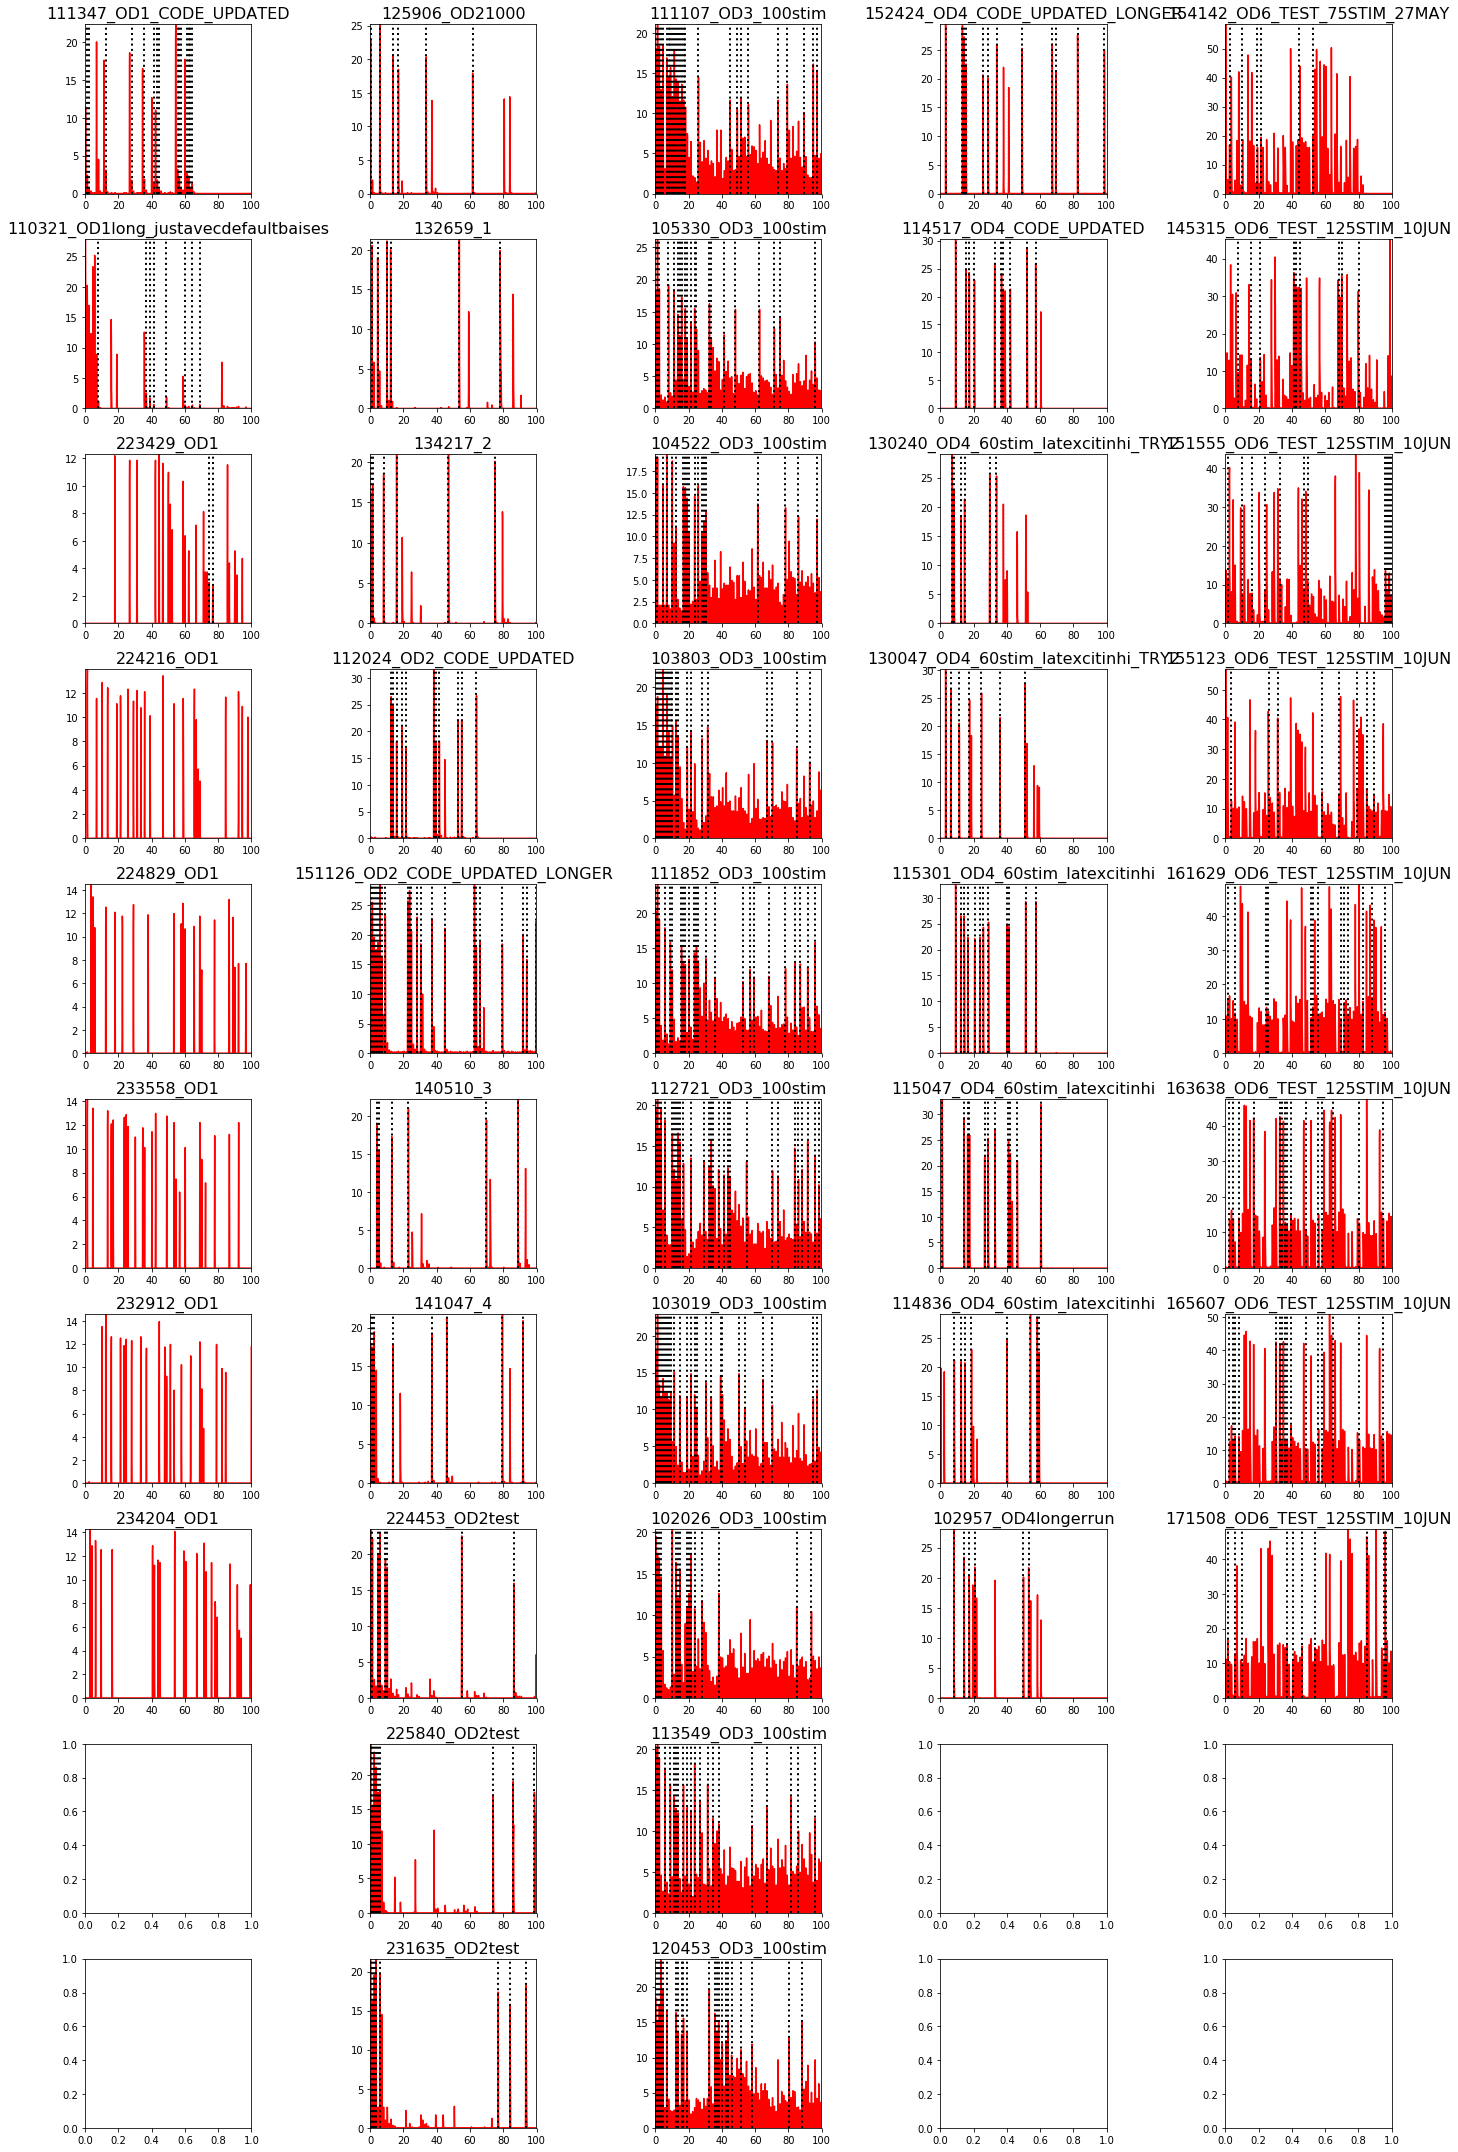

In [8]:
# set stimulation times manually for indidivual recordings (print detected ones and adjust)
# stim_times_per_cond['214940_OD1'] = []
# stim_times_per_cond['215905_OD1'] = []

stim_times_per_cond['154142_OD6_TEST_75STIM_27MAY'] =  [ 2.85, 10.15, 19.25, 21.45, 44.35, 52.55] #,  69.25
stim_times_per_cond['145315_OD6_TEST_125STIM_10JUN']= [  7.35, 15.45, 20.95,   41.15, 42.35,  45.05,   68.35, 70.05, 80.05] #80,  45.45, 
stim_times_per_cond['151555_OD6_TEST_125STIM_10JUN'] =  [1.35,  10.15,  15.95, 23.75,   32.65, 47.25, 49.45, 96.15, 97.35, 98.45, 99.65 ] #63.95, 52.85,   86.15, 
stim_times_per_cond['155123_OD6_TEST_125STIM_10JUN']=  [3.65, 26.05,  31.55,  58.15,  68.15,79.25,  84.85,  89.35]
stim_times_per_cond['161629_OD6_TEST_125STIM_10JUN']= [1.35,  5.85,  24.65, 25.85,  51.55, 52.55,  55.95, 69.35, 71.45, 73.75, 82.55 ,   87.95, 95.95]
stim_times_per_cond['163638_OD6_TEST_125STIM_10JUN']= [2.45, 4.75, 8.15, 17.15, 32.85, 33.75, 36.05, 37.15, 39.35,  48.25, 55.95, 58.25, 64.85,  80.45,   94.95] #47.05, 30.45,
stim_times_per_cond['165607_OD6_TEST_125STIM_10JUN']= [2.45, 4.75, 5.85, 8.05,    30.55, 32.75, 33.85,  36.05, 37.15,  39.25,   48.25, 55.95, 58.25, 64.95,  80.55 , 94.95]# 17.05,15.15,
stim_times_per_cond['171508_OD6_TEST_125STIM_10JUN'] =  [ 1.35,  5.75, 10.25,   37.05, 40.45,  45.95, 53.75, 85.05, 95.05, 96.35] # 69.35, 28.05,

stim_times_per_cond['152424_OD4_CODE_UPDATED_LONGER'] =  [ 3.15 ,13.25, 14.35 ,15.55 ,25.55, 28.75, 33.85,   49.15, 67.25 ,69.35, 82.45, 98.55] #37.95,
stim_times_per_cond['114517_OD4_CODE_UPDATED']= [ 9.15, 15.35, 17.35, 20.45, 32.65, 36.75, 37.85,42.05 ,  52.15, 57.25] #, 60.35 , 38.95 
stim_times_per_cond['130240_OD4_60stim_latexcitinhi_TRY2'] =  [ 7.15,  8.25, 12.45, 14.55, 29.65 ,33.75]#51.35, 37.85 
#stim_times_per_cond['130047_OD4_60stim_latexcitinhi_TRY2']= [ 3.15  6.25 11.35 17.55 18.65 24.75 35.85 50.95]
#stim_times_per_cond['115301_OD4_60stim_latexcitinhi']= [ 9.15 12.25 14.35 16.55 20.65 23.75 25.85 28.95 40.05 41.15 51.25 57.35]
#stim_times_per_cond['115047_OD4_60stim_latexcitinhi']=  [ 1.15 14.25 16.35 17.55 26.65 28.75 32.85 40.95 42.05 46.25 60.35]
#stim_times_per_cond['114836_OD4_60stim_latexcitinhi']=  [ 0.25  2.35  8.45 12.55 14.65 18.75 40.05 54.15 58.25 59.35]
#stim_times_per_cond['151739_OD4_60stim'] =   [10.15 28.55 41.75]
#stim_times_per_cond['102957_OD4longerrun'] = [ 8.15 14.25 17.35 19.45 20.65 32.85 49.95 53.05 58.35]



#stim_times_per_cond['154142_OD6_TEST_75STIM_27MAY'] = [2.45,  3.55, 13.55 , 16.95, 19.25, 21.45, 29.25,34.75, 56.95, 58.15, 59.2, 63.65, 65.95, 69.25, 72.65] #[2.45, 15.85, 19.25, 45.85,52.55, 59.25, 62.65 ,69.25]
#stim_times_per_cond['145315_OD6_TEST_125STIM_10JUN']= [0.95,8.75, 13.15,  20.95,  27.65, 29.85,  67.65 , 67.65, 75.45,  79.85,   90.95, 92, 98.75]
#stim_times_per_cond['151555_OD6_TEST_125STIM_10JUN'] = [ 0.25, 5.75,   29.25, 31.45, 37.05,  44.95,  56.05,  66.05,  80.45, 86.15, 88.35]
#stim_times_per_cond['155123_OD6_TEST_125STIM_10JUN']= [9.75, 10.85, 24.15, 30.85,  44.25,  48.65, 51.95, 65.35,  82.05,  89.85, 93.15]
#stim_times_per_cond['161629_OD6_TEST_125STIM_10JUN']= [ 2.45,   4.65,  10.15, 11.35,  26.85, 39.15, 44.75, 45.75, 48.05 ,49.25, 54.75, 58.15, 59.25, 61.45,  64.75, 65.85, 74.75, 79.25, 97.05]
#stim_times_per_cond['163638_OD6_TEST_125STIM_10JUN']= [3.65,   9.25,  12.45,  36.05, 51.45, 61.55,  63.75,71.55,  84.85,  89.35, 92.65]
#stim_times_per_cond['165607_OD6_TEST_125STIM_10JUN']=  [ 3.65,  12.45,  28.15, 36.05, 37.15, 51.45, 55.95,  61.55,  63.75,  71.55,  84.85, 87.15, 88.25, 89.35, 90.45, 92.65]
#stim_times_per_cond['171508_OD6_TEST_125STIM_10JUN'] = [11.35,  15.85, 16.85, 20.35,  26.85,  29.15, 31.35, 32.55,  41.55,  50.45, 52.75, 70.55, 73.75,  93.85]
#stim_times_per_cond['153539_OD6_TEST_125STIM_10JUN'] = [ 0.85,  10.85, 40.85,  51.95,  69.85, 84.25, 93.15]



verbose = True
# per recording plot mfr and stim_times_per_cond
fig, axes = plt.subplots(ncols=n_paradigms, nrows=max_n_recs_per_paradigm, figsize=(20, 3*max_n_recs_per_paradigm))
for paradigm_nr, OD_name in enumerate(paradigm_names_ordered):
    OD_rec_names = all_rec_names[OD_name]
    for rec_nr, rec_name_to_show in enumerate(OD_rec_names):
        if verbose:
            print('\n', rec_name_to_show, '\n', stim_times_per_cond[rec_name_to_show])
            print(rec_name_to_show, 'num_peaks:', len(np.asarray(network_activity_org[rec_name_to_show].t_poppeaks)))
        ax = axes[rec_nr, paradigm_nr]
        datamodel = StateVariablesModel(state_variable_names=['mfr'], state_variables=[network_activity_org[rec_name_to_show].mfr.flatten()], 
                                        state_variables_times=[network_activity_org[rec_name_to_show].t_mfr[:, 1]])
        LineplotController(DataModel_to_x_and_y_attr=[(datamodel , ('t_mfr', 'mfr'))], mainfig=fig, subfig=ax, show_immediately=False, title=rec_name_to_show)
        for t_peak in stim_times_per_cond[rec_name_to_show]:
            ax.axvline(x=t_peak, color='k', linestyle=':', linewidth=2)
plt.tight_layout()

### spike count histogram per paradigm

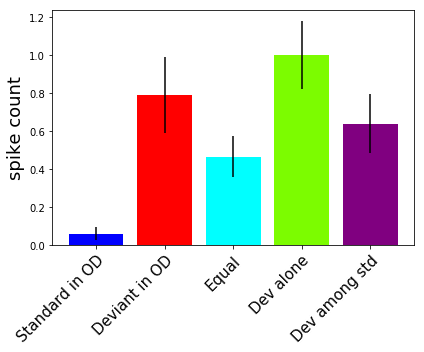

In [20]:
dt_init = 3
window_length = .5  # in seconds

# collect spike count per recording
spikecount_per_cond_split = {}
for rec_name, column_events in network_activity_org.items():
    spikecount_per_cond_split[rec_name] = []
    for t_nr, t_start in enumerate(stim_times_per_cond[rec_name]):
        if t_start > dt_init:
            ts, neuron_ids = DC.filter_events(all_spike_times=column_events.ts, all_neuron_ids=column_events.neuron_id, interval=(t_start, t_start + window_length))
            spikecount_per_cond_split[rec_name].append(len(neuron_ids))
            
# collect spike counts per paradigm (collect over recordings of the same paradigm)
collected_spikecount_per_cond_split = {}
for paradigm_nr, OD_name in enumerate(paradigm_names_ordered):
    OD_rec_names = all_rec_names[OD_name]
    collected_spikecount_per_cond_split[OD_name] = []
    for rec_nr, rec_name in enumerate(OD_rec_names):
        collected_spikecount_per_cond_split[OD_name].extend(spikecount_per_cond_split[rec_name])



# plot
max_spike_count = np.mean(collected_spikecount_per_cond_split['OD4'])  # to normalize spike counts with dev alone

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
color_to_rec_name = {'OD1': 'b', 'OD2': 'r',  'OD3': 'cyan', 'OD4': 'lawngreen' , 'OD6': 'purple'}       #darkmagenta
for rec_nr, (OD_name, num_spikes) in enumerate(collected_spikecount_per_cond_split.items()):
    avg_num_spikes = np.mean(num_spikes)
    ax.bar(x=rec_nr, height=avg_num_spikes/max_spike_count, color=color_to_rec_name[OD_name], yerr=np.std(num_spikes)/max_spike_count)
ax.set_ylabel('spike count', fontsize=18)
ax.set_xlabel('', fontsize=60 )
ax.set_ylim(0)
names = ['','Standard in OD', 'Deviant in OD', 'Equal',  'Dev alone', 'Dev among std']
#names = ['','','','','']

ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right", fontsize=15)

#for spine in ax.spines:
 #   ax.spines[spine].set_visible(False)
    
plt.tight_layout()

plt.savefig('fig8D.pdf')

### plot

Text(0.5,0,'Spike count (response strenght)')

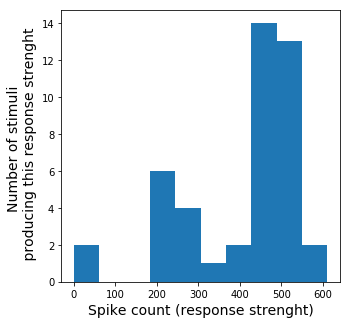

In [188]:
dt_init = 5


stim_times_per_cond = {'f1_10Hz_20percent_f2_12Hz_20percent': [1.1350e+01 , 2.2450e+01, 4.0150e+01,  4.7950e+01,
                                                            4.9050e+01, 5.2450e+01, 5.7950e+01, 6.2450e+01,
                                                           6.6850e+01, 7.1250e+01, 72,7.7950e+01, 8.0150e+01,
                                                           8.3450e+01,8.5750e+01, 8.7950e+01, 9.6950e+01, 
                                                           9.9150e+01,  1.0465e+02,1.0695e+02,  1.1025e+02,
                                                           1.1135e+02, 1.1805e+02, 1.2025e+02, 1.3025e+02, 
                                                           1.3585e+02,  1.4365e+02,1.5035e+02,
                                                           1.5805e+02,  1.6815e+02,1.7595e+02 ,   
                                                           1.8375e+02 ,   2.1705e+02, 223, 2.2485e+02,2.4045e+02, 2.4155e+02, 2.4815e+02 , 
                                                           2.5705e+02,2.6045e+02 ,  2.8605e+02, 2.9495e+02, 
                                                           2.9595e+02,  2.9825e+02]} 


network_activity = deepcopy(network_activity_org)



mfrs_per_condition, t_mfrs_per_condition = {}, {}
spikecount_per_cond = {}
spikecount_per_cond_split['f1_10Hz_20percent_f2_12Hz_20percent'] = []
mfrs_per_condition['f1_10Hz_20percent_f2_12Hz_20percent']   = np.zeros([int(np.ceil(window_length/step_size)), len(stim_times)])
t_mfrs_per_condition['f1_10Hz_20percent_f2_12Hz_20percent'] = np.zeros([int(np.ceil(window_length/step_size))])
#spikecount_per_cond_split = {}
for t_nr, t_start in enumerate(stim_times):
    if t_start > dt_init:
        ts, neuron_ids = DC.filter_events(all_spike_times=column_events.ts, all_neuron_ids=column_events.neuron_id, interval=(t_start, t_start + window_length))
        spikecount_per_cond_split['f1_10Hz_20percent_f2_12Hz_20percent'].append(len(neuron_ids))
        tmp_network_act = {'f1_10Hz_20percent_f2_12Hz_20percent': SpikeEvents(neuron_id=neuron_ids, ts=list(np.asarray(ts)-t_start))}
        get_meanfiringrate_from_network_activity(network_activity=tmp_network_act, max_neuron_id=max_neuron_id,
                                            t_start=0., t_end=window_length, step_size=step_size, window_size=window_size,
                                            pop_average=True, active_neuron_ids={'f1_10Hz_20percent_f2_12Hz_20percent': all_active_neuron_ids['f1_10Hz_20percent_f2_12Hz_20percent']})
        mfrs_per_condition['f1_10Hz_20percent_f2_12Hz_20percent'][:, t_nr] = tmp_network_act['f1_10Hz_20percent_f2_12Hz_20percent'].mfr.flatten() 
        t_mfrs_per_condition['f1_10Hz_20percent_f2_12Hz_20percent'][:] = tmp_network_act['f1_10Hz_20percent_f2_12Hz_20percent'].t_mfr[:,0]  # collect timestamps




#x= spike count response strenght
#y= number of stimuli producing reponse strenght (counts)
gridspec.GridSpec(1,4)
fig = plt.figure(figsize=(11, 5))
ax2=plt.subplot2grid((1,2), (0,1), colspan=1, rowspan=1)
plt.hist(spikecount_per_cond_split['f1_10Hz_20percent_f2_12Hz_20percent'])
ax2.set_ylabel('Number of stimuli \n producing this response strenght', fontsize=14)
ax2.set_xlabel('Spike count (response strenght)', fontsize=14 )